# Implementasi Generative Adversarial Network (GAN)
## Kelompok 2


**Dataset**: MNIST  
**Framework**: PyTorch

### Apa itu GAN?
Generative Adversarial Network (GAN) adalah model jaringan saraf tiruan yang digunakan untuk menghasilkan data baru yang memiliki karakteristik mirip dengan data asli.
GAN diperkenalkan oleh Ian Goodfellow dan rekan-rekannya pada tahun 2014.
GAN bekerja dengan konsep persaingan (adversarial) antara dua model neural network:
- Generator (G) → berperan menghasilkan data palsu yang realistis.
- Discriminator (D) → berperan membedakan antara data asli dan data palsu.

### Komponen Utama dalam GAN
### A. Generator(G)

Generator adalah bagian dari GAN yang bertugas membuat data palsu yang meniru data asli. Generator bekerja dengan cara:
- Menerima input berupa noise (vektor angka acak).
- Mengubah noise ini menjadi data sintetis melalui jaringan saraf tiruan (neural network).
- Menghasilkan data yang memiliki pola mirip dengan data asli agar sulit dibedakan oleh Discriminator.

### Tujuan Generator
- Menipu Discriminator dengan membuat data yang terlihat realistis.
- Menciptakan variasi data baru berdasarkan distribusi data asli.
- Meningkatkan kualitas data sintetis seiring proses pelatihan.

### Cara Kerja Sederhana
- Generator memulai dari angka acak seperti [0.12, -0.45, 0.33, ...].
- Angka ini diproses lewat lapisan-lapisan jaringan saraf (fully connected, convolution, dll).
- Output yang dihasilkan adalah gambar, audio, teks, atau bentuk data lain yang mirip data asli.

### Analoginya
Bayangkan Generator sebagai pemalsu:
- Dia mulai dari kertas kosong (noise).
- Sedikit demi sedikit dia belajar meniru uang asli (data asli) berdasarkan umpan balik dari polisi (Discriminator).
- Lama-lama, uang palsu buatan Generator terlihat sangat mirip dengan uang asli.

### Contoh Generator
Misalnya kita melatih GAN untuk menghasilkan gambar wajah manusia:
- Input: noise acak seperti [0.27, -0.84, 0.59, ...].
- Proses: Generator menggunakan lapisan Convolutional Neural Network (CNN) untuk membentuk pola mata, hidung, mulut, dan tekstur kulit.
- Output: gambar wajah fiktif yang tidak ada di dunia nyata, tapi terlihat realistis.

📌 Contoh nyatanya: *Situs This Person Does Not Exist* — setiap kali dibuka, Generator akan membuat wajah baru yang tidak pernah ada sebelumnya.

### B. Discriminator (D)
Discriminator adalah bagian dari GAN yang bertugas membedakan mana data asli dari dataset dan mana data palsu hasil Generator.
Bisa dibilang, Discriminator adalah model klasifikasi biner (dua kelas: asli atau palsu).

### Fungsi Utama
- Memeriksa setiap data yang masuk (baik dari dataset asli maupun hasil Generator).
- Menghasilkan nilai probabilitas antara 0–1:
    - Nilai mendekati 1 → data dianggap asli.
    - Nilai mendekati 0 → data dianggap palsu.
- Memberikan feedback ke Generator supaya Generator belajar membuat data yang lebih sulit dikenali.

### Cara Kerja Discriminator
- Input: Discriminator menerima satu data (misalnya gambar).
- Proses: Data tersebut diproses melalui jaringan saraf (biasanya CNN untuk gambar).
- Output: Probabilitas apakah data tersebut asli atau palsu.

### Analoginya
Bayangkan Discriminator sebagai polisi ahli forensik:
- Polisi memeriksa uang.
- Jika ciri-cirinya cocok dengan uang asli → "Asli".
- Jika ada yang aneh → "Palsu".
- Setiap kali polisi salah, dia belajar supaya lebih pintar mendeteksi.

### Contoh Discriminator
Misalnya kita melatih GAN untuk menghasilkan gambar kucing:
- Input 1: Gambar kucing asli dari dataset.
- Input 2: Gambar kucing palsu dari Generator.
- Proses: Discriminator menganalisis pola bulu, bentuk mata, telinga, warna.
- Output:
    - Gambar asli → probabilitas tinggi (misalnya 0.95).
    - Gambar palsu → probabilitas rendah (misalnya 0.15).

### Hubungan dengan Generator
- Discriminator membuat Generator menjadi lebih baik karena setiap kali Generator gagal menipu Discriminator, Generator akan memperbaiki hasilnya.

- Pertarungan ini berlanjut sampai Discriminator kesulitan membedakan antara data asli dan palsu.

### Kesimpulan 
Generative Adversarial Network (GAN) adalah arsitektur jaringan saraf tiruan yang menggunakan dua model yang saling berlawanan, yaitu Generator dan Discriminator, untuk menghasilkan data baru yang mirip dengan data asli.
- Generator bertugas membuat data palsu dari input berupa noise acak, dengan tujuan menipu Discriminator.
- Discriminator bertugas membedakan data asli dan data palsu, memberikan umpan balik agar Generator semakin baik.

Proses pelatihan GAN bersifat seperti pertarungan dua pemain: Generator terus belajar membuat data yang realistis, sementara Discriminator terus belajar mengenali data palsu. Pertarungan ini akan menghasilkan Generator yang sangat mahir hingga data buatannya sulit dibedakan dari data asli.

GAN telah terbukti bermanfaat di berbagai bidang, seperti pembuatan gambar realistis, peningkatan resolusi gambar (super-resolution), image-to-image translation, deepfake, dan generasi seni digital. Namun, GAN juga memiliki tantangan seperti pelatihan yang sulit dan risiko mode collapse.

Dengan memahami peran Generator dan Discriminator, kita bisa memanfaatkan GAN secara optimal untuk inovasi di bidang visual, audio, dan data sintetis lainnya.


In [1]:
# Import library
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision   # ← tambahkan baris ini
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os


# Buat folder untuk menyimpan hasil
os.makedirs('generated_images', exist_ok=True)
os.makedirs('models', exist_ok=True)


## Load Dataset MNIST


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # range -1 sampai 1
])

batch_size = 128
dataloader = DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 455kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.64MB/s]


## Buat Generator & Discriminator
 Penjelasan Generator
 
 Penjelasan Discriminator


In [5]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 28*28),
            nn.Tanh()
        )
    def forward(self, z):
        img = self.model(z)
        return img.view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, img):
        flat = img.view(img.size(0), -1)
        return self.model(flat)


## Inisialisasi model, loss, dan optimizer


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
lr = 0.0002

optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)


## Training Loop


In [18]:
num_epochs = 50
loss_G_history, loss_D_history = [], []

for epoch in range(1, num_epochs+1):
    loss_G_epoch, loss_D_epoch = 0, 0
    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Label real=1, fake=0
        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)

        ## Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, 100, device=device)
        gen_imgs = G(z)
        pred_fake = D(gen_imgs)
        loss_G = criterion(pred_fake, valid)
        loss_G.backward()
        optimizer_G.step()

        ## Train Discriminator
        optimizer_D.zero_grad()
        pred_real = D(real_imgs)
        loss_real = criterion(pred_real, valid)

        pred_fake = D(gen_imgs.detach())
        loss_fake = criterion(pred_fake, fake)

        loss_D = (loss_real + loss_fake) / 2
        loss_D.backward()
        optimizer_D.step()

        loss_G_epoch += loss_G.item()
        loss_D_epoch += loss_D.item()

    # Simpan history loss
    loss_G_history.append(loss_G_epoch / len(dataloader))
    loss_D_history.append(loss_D_epoch / len(dataloader))

    print(f"[Epoch {epoch}/{num_epochs}] Loss G: {loss_G_history[-1]:.4f}, Loss D: {loss_D_history[-1]:.4f}")

    # Simpan gambar setiap 10 epoch
    if epoch % 10 == 0:
        print(f" Saving sample image at epoch {epoch}")
        with torch.no_grad():
            z = torch.randn(25, 100, device=device)
            samples = G(z).cpu()
            grid = torchvision.utils.make_grid(samples, nrow=5, normalize=True)
            plt.figure(figsize=(5,5))
            plt.imshow(grid.permute(1, 2, 0).numpy())
            plt.axis('off')
            plt.savefig(f"generated_images/epoch_{epoch}.png")
            plt.close()

# Simpan model setelah training selesai
torch.save(G.state_dict(), "models/generator.pth")
torch.save(D.state_dict(), "models/discriminator.pth")

print(" Training selesai. Model & gambar sample sudah disimpan.")


[Epoch 1/50] Loss G: 2.1508, Loss D: 0.3390
[Epoch 2/50] Loss G: 2.0825, Loss D: 0.3463
[Epoch 3/50] Loss G: 2.1259, Loss D: 0.3455
[Epoch 4/50] Loss G: 2.0974, Loss D: 0.3438
[Epoch 5/50] Loss G: 2.1178, Loss D: 0.3473
[Epoch 6/50] Loss G: 2.1821, Loss D: 0.3351
[Epoch 7/50] Loss G: 2.2843, Loss D: 0.3188
[Epoch 8/50] Loss G: 2.5408, Loss D: 0.2900
[Epoch 9/50] Loss G: 2.4791, Loss D: 0.3026
[Epoch 10/50] Loss G: 2.4916, Loss D: 0.3023
 Saving sample image at epoch 10
[Epoch 11/50] Loss G: 2.4928, Loss D: 0.2908
[Epoch 12/50] Loss G: 2.4034, Loss D: 0.3075
[Epoch 13/50] Loss G: 2.2473, Loss D: 0.3430
[Epoch 14/50] Loss G: 2.1834, Loss D: 0.3429
[Epoch 15/50] Loss G: 2.1291, Loss D: 0.3476
[Epoch 16/50] Loss G: 2.0728, Loss D: 0.3611
[Epoch 17/50] Loss G: 2.0448, Loss D: 0.3644
[Epoch 18/50] Loss G: 2.0496, Loss D: 0.3684
[Epoch 19/50] Loss G: 1.9861, Loss D: 0.3733
[Epoch 20/50] Loss G: 1.9290, Loss D: 0.3739
 Saving sample image at epoch 20
[Epoch 21/50] Loss G: 1.9676, Loss D: 0.369

**penjelasan Training Loop**

training pada GAN melibatkan dua model: Generator dan Discriminator

adapun pada setiap epoch terdiri dari:
- melatih Discriminator dengan mengambil real images, membuat fake images, menghitung loss Discriminator dan meng-update kinerjanya di epoch berikutnya
- melatih Generator dengan membuat fake images lagi dari noise, memberi label 1 pada fake images untuk mengecoh Discriminator, dan meng-update kinerjanya di epoch berikutnya
- menyimpan nilai loss dari Generator dan Discriminator untuk visualisasi grafik training
- menyimpan hasil gambar Generator setiap 10 epoch untuk melihat perkembangan kualitas gambar

dengan begitu Discriminator akan lebih baik dalam membedakan dan Generator menjadi lebih pandai 'menipu' Discriminator


**perkembangan gambar dari Generator hasil training**

- epoch 10 : gambar masih sangat kabur, bentuk angka belum terlihat jelas.
- epoch 20 : banyak gambar tampak mirip satu sama lain (mode collapse), bentuk angka tidak beragam.
- epoch 30 : bentuk angka mulai terlihat, meskipun noise masih tinggi.
- epoch 40 : bentuk digit makin jelas, variasi angka lebih baik, dan noise mulai berkurang.
- epoch 50 : sebagian besar angka sudah menyerupai digit MNIST, menunjukkan Generator mulai berhasil menangkap pola distribusi data.

Hasil ini menunjukkan bahwa training GAN berhasil mengajarkan Generator untuk menghasilkan angka tangan yang semakin realistis dari waktu ke waktu.

## Visualisasi Loss

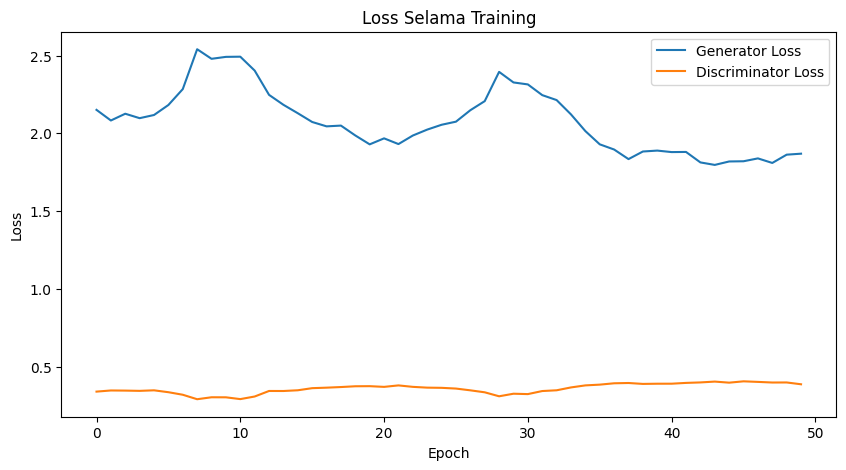

In [19]:
plt.figure(figsize=(10,5))
plt.plot(loss_G_history, label='Generator Loss')
plt.plot(loss_D_history, label='Discriminator Loss')
plt.legend()
plt.title('Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
